<a href="https://colab.research.google.com/github/BorisLoveDev/agents-of-uniform-difficulty/blob/main/mnist_generate0_6level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

In [3]:
from google.colab import drive
# Подключение Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# Загрузка и нормализация данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Применение one-hot encoding
y_test_ohe = to_categorical(y_test, 10)
y_train_ohe = to_categorical(y_train, 10)
y_train_ohe.shape

(60000, 10)

In [18]:
# Создание и обучение модели на тестовых данных
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train[:10000], y_train_ohe[:10000], epochs=5, batch_size=32, verbose=1)


Epoch 1/5
313/313 [==============================] - 2s 3ms/step - loss: 0.5183 - accuracy: 0.8580
Epoch 2/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2456 - accuracy: 0.9307
Epoch 3/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1805 - accuracy: 0.9498
Epoch 4/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1429 - accuracy: 0.9592
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1104 - accuracy: 0.9680


In [35]:
# Оценка модели на тестовых данных
# Сначала необходимо преобразовать x_test к формату, совместимому с моделью
x_test_reshaped = x_test.reshape(-1, 28, 28, 1)
# Оценка точности на тестовом наборе
loss, accuracy = model.evaluate(x_test_reshaped, y_test_ohe, verbose=0)
print(f"Точность на тестовых данных: {accuracy*100:.2f}%")

# Прогнозирование на тестовых данных
predictions = model.predict(x_test_reshaped)

# Преобразование прогнозов в индексы максимальных значений (классы)
predicted_classes = np.argmax(predictions, axis=1)

# Сравнение предсказанных классов с истинными и сохранение индексов правильно классифицированных образцов
correct_indices = np.nonzero(predicted_classes == y_test)[0]

# Создание подмножества x_test и y_test, содержащего только правильно классифицированные примеры
x_test_subset = x_test[correct_indices]
y_test_subset = y_test[correct_indices]

# Путь к папке на Google Drive
folder_path = '/content/drive/My Drive/all_difficulty_data_mnist'

# Проверяем, существует ли папка, если нет - создаем ее
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f'Папка {folder_path} создана.')
else:
    print(f'Папка {folder_path} уже существует.')
# Убираем ограничение на количество сохраняемых данных
# Сохранение данных
np.save(os.path.join(folder_path, 'x_data_difficult_level_0.npy'), x_test_subset)
np.save(os.path.join(folder_path, 'y_data_difficult_level_0.npy'), y_test_subset)

print(f'Сохранено {len(correct_indices)} изображений и их меток, которые были правильно классифицированы моделью.')


Точность на тестовых данных: 94.39%
313/313 [==============================] - 1s 2ms/step
Папка /content/drive/My Drive/all_difficulty_data_mnist уже существует.
Сохранено 9439 изображений и их меток, которые были правильно классифицированы моделью.


In [25]:
model2 = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение model2 на тренировочных данных
model2.fit(x_train, y_train_ohe, epochs=10, batch_size=128, validation_split=0.1, verbose=1)


Epoch 1/10
422/422 [==============================] - 9s 9ms/step - loss: 0.2239 - accuracy: 0.9305 - val_loss: 0.0531 - val_accuracy: 0.9845
Epoch 2/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0706 - accuracy: 0.9774 - val_loss: 0.0388 - val_accuracy: 0.9905
Epoch 3/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0537 - accuracy: 0.9839 - val_loss: 0.0310 - val_accuracy: 0.9902
Epoch 4/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0422 - accuracy: 0.9867 - val_loss: 0.0310 - val_accuracy: 0.9908
Epoch 5/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0354 - accuracy: 0.9888 - val_loss: 0.0312 - val_accuracy: 0.9905
Epoch 6/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0317 - accuracy: 0.9906 - val_loss: 0.0272 - val_accuracy: 0.9930
Epoch 7/10
422/422 [==============================] - 4s 10ms/step - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.0256 - val_accuracy: 0.9925
Epoch

In [23]:
# Функция для деформации изображения, как определено ранее
def deform_image_optimized(image, A, B, M=28, NP=5):
    C = M / (NP + 1.0)
    XN, YN = np.zeros(M), np.zeros(M)
    DX, DY = np.linspace(0, M-1, M), np.linspace(0, M-1, M)

    for j in range(NP):
        TXN = (j + 0.5 - np.random.random()) * C
        TYN = (j + 0.5 - np.random.random()) * C
        TDX = (j + 0.5 - np.random.random()) * C
        TDY = (j + 0.5 - np.random.random()) * C
        AXN = B * (1.0 - 2.0 * np.random.random())
        AYN = B * (1.0 - 2.0 * np.random.random())
        ADX = A * (1.0 - 2.0 * np.random.random())
        ADY = A * (1.0 - 2.0 * np.random.random())
        PXN = (0.1 + 0.9 * np.random.random()) * C
        PYN = (0.1 + 0.9 * np.random.random()) * C
        PDX = (0.1 + 0.9 * np.random.random()) * C
        PDY = (0.1 + 0.9 * np.random.random()) * C

        DX += ADX * np.exp(-((DX - TDX) / PDX)**2)
        DY += ADY * np.exp(-((DY - TDY) / PDY)**2)
        XN += AXN * np.exp(-((DX - TXN) / PXN)**2)
        YN += AYN * np.exp(-((DY - TYN) / PYN)**2)

    deformed_image = np.zeros((M, M))
    for j in range(M):
        for i in range(M):
            x_index = int(DX[i] + XN[j])
            y_index = int(DY[j] + YN[i])
            if 0 <= x_index < M and 0 <= y_index < M:
                deformed_image[j, i] = image[y_index, x_index] if y_index < image.shape[0] and x_index < image.shape[1] else 0

    return deformed_image

In [26]:
# Оценка точности на тестовом наборе
loss, accuracy = model2.evaluate(x_test_reshaped, y_test_ohe, verbose=0)
print(f"Точность на тестовых данных: {accuracy*100:.2f}%")

Точность на тестовых данных: 99.35%


In [32]:
# Параметры деформации для неразличимых изображений
A, B = 12.0, 32.0

# Подготовка деформированных тестовых данных
deformed_images = np.array([deform_image_optimized(image.reshape(28, 28), A, B) for image in x_test]).reshape(-1, 28, 28, 1)

# Переформатирование меток тестовых данных для совместимости с оценкой
y_test_ohe_deformed = to_categorical(y_test, 10)

# Оценка точности на деформированных тестовых данных
loss, accuracy = model2.evaluate(deformed_images, y_test_ohe_deformed, verbose=0)
print(f"Точность на деформированных тестовых данных: {accuracy*100:.2f}%")


Точность на деформированных тестовых данных: 11.14%


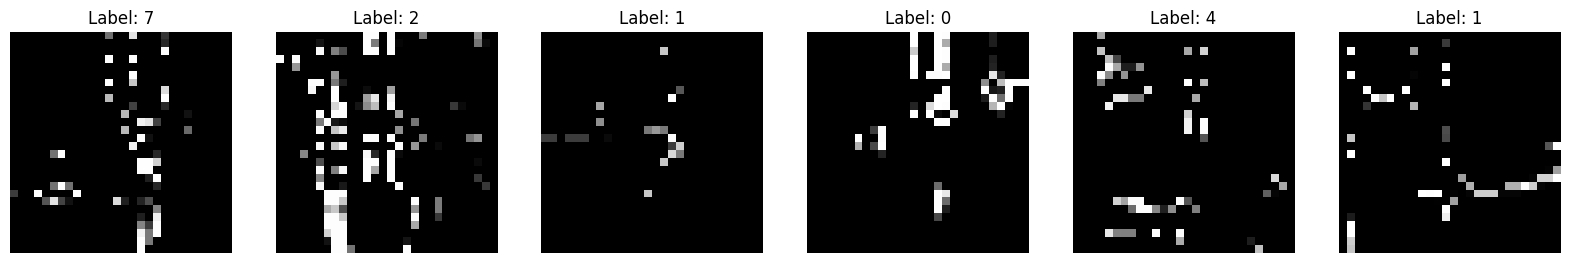

In [33]:
# Выбор и вывод 6 деформированных изображений
fig, axes = plt.subplots(1, 6, figsize=(20, 3))
for i, ax in enumerate(axes):
    ax.imshow(deformed_images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y_test[i]}")
    ax.axis('off')
plt.show()


In [34]:
# Сохранение всех деформированных изображений и их меток в указанной папке на Google Drive
np.save(os.path.join(folder_path, 'x_data_difficult_level_6.npy'), deformed_images)
np.save(os.path.join(folder_path, 'y_data_difficult_level_6.npy'), y_test)

print(f'Все деформированные изображения и их метки для уровня сложности 6 сохранены.')


Все деформированные изображения и их метки для уровня сложности 6 сохранены.
